In [1]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET
from config.baseline_config import *
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [3]:
model = SimpleNET()
model.to(device)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [4]:
out_dict_adam = train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.547	 test: 0.642	 Accuracy train: 73.2%	 test: 63.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.469	 test: 0.609	 Accuracy train: 79.4%	 test: 67.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.422	 test: 0.639	 Accuracy train: 82.2%	 test: 62.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.371	 test: 0.579	 Accuracy train: 85.0%	 test: 71.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.317	 test: 0.635	 Accuracy train: 87.2%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.257	 test: 0.600	 Accuracy train: 90.4%	 test: 68.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.196	 test: 0.564	 Accuracy train: 93.2%	 test: 72.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.132	 test: 0.652	 Accuracy train: 96.9%	 test: 68.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.099	 test: 0.626	 Accuracy train: 97.7%	 test: 72.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.072	 test: 0.559	 Accuracy train: 99.2%	 test: 74.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.058	 test: 0.600	 Accuracy train: 99.2%	 test: 74.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.052	 test: 0.587	 Accuracy train: 99.1%	 test: 75.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.042	 test: 0.593	 Accuracy train: 99.6%	 test: 74.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.035	 test: 0.577	 Accuracy train: 99.6%	 test: 75.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.030	 test: 0.591	 Accuracy train: 99.8%	 test: 74.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.025	 test: 0.607	 Accuracy train: 99.7%	 test: 75.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.022	 test: 0.603	 Accuracy train: 99.8%	 test: 76.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.020	 test: 0.622	 Accuracy train: 99.7%	 test: 75.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.017	 test: 0.616	 Accuracy train: 100.0%	 test: 74.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.015	 test: 0.659	 Accuracy train: 99.9%	 test: 74.2%


In [7]:
# saving results
optim = 'Adam'
d = out_dict_adam
with open(f'results/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(d.keys())
    writer.writerows(zip(*d.values()))

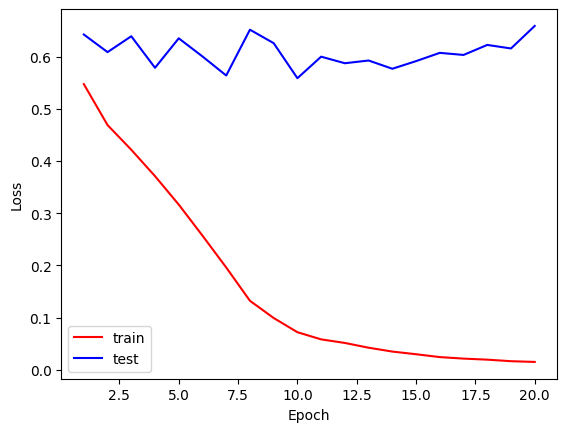

In [8]:
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['train_loss'], c='r', label='train')
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['test_loss'], c='b', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()